In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'Page Views')

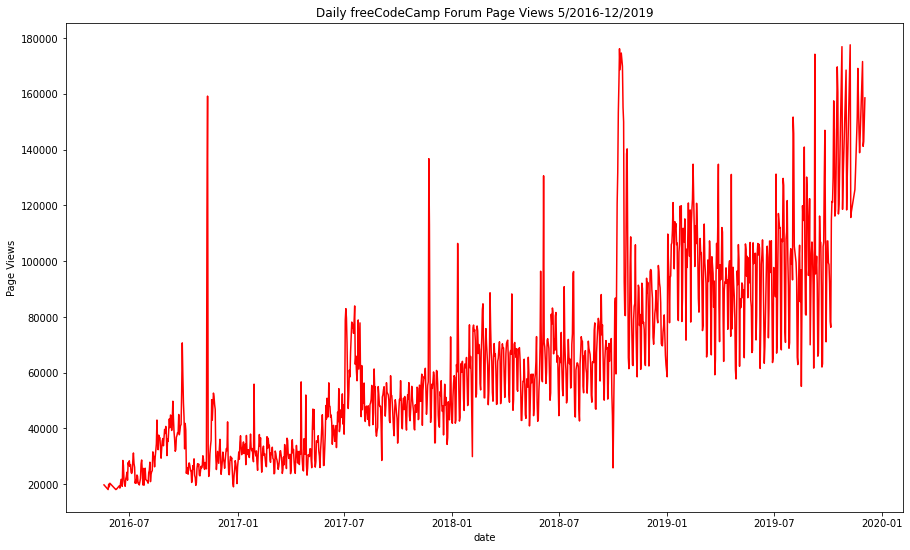

In [194]:
# draw a line chart similar to "examples/Figure_1.png".
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views"

fig, ax = plt.subplots(figsize=(15,9))
ax.plot(df.reset_index()['date'], df['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('date')
ax.set_ylabel('Page Views')


In [195]:
# draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of "Months".
# On the chart, the label on the x axis should be "Years"and the label on the y axis should be "Average Page Views".
import datetime
df_bar = df.copy()
df_bar['Months'] = pd.DatetimeIndex(df_bar.reset_index()['date']).month
df_bar['Years'] = pd.DatetimeIndex(df_bar.reset_index()['date']).year
df_bar = df_bar.groupby(['Years','Months'])['value'].mean().reset_index(name ='average')
df_bar['average'] = df_bar['average'].round().astype('int')
def changemonth(row):
    return datetime.datetime.strptime(str(row['Months']), "%m").strftime("%B")
df_bar['Months'] = df_bar.apply(changemonth, axis=1)
df_bar.head()

,Years,Months,average
0,2016,May,19432
1,2016,June,21875
2,2016,July,24110
3,2016,August,31049
4,2016,September,41477


[Text(0, 0.5, 'Average Page Views')]

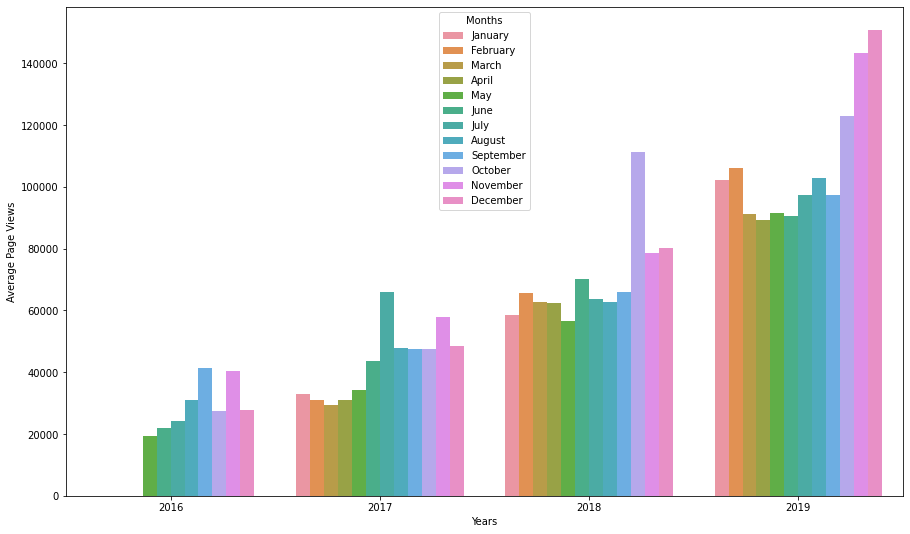

In [196]:
month_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(data=result, x='Years', y='average', hue='Months', hue_order=month_label)
ax.set(ylabel='Average Page Views')

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

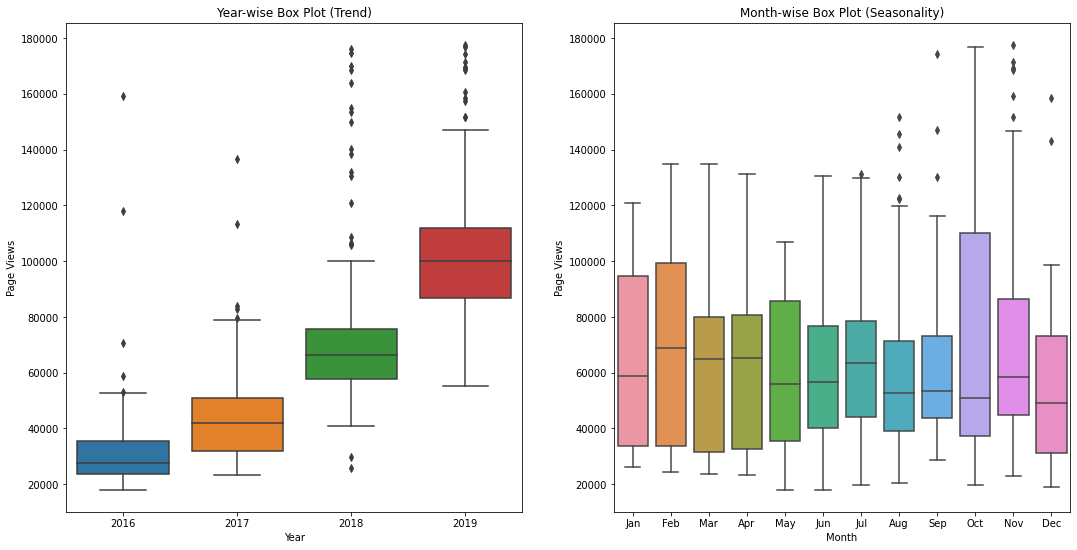

In [197]:
# Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be "Year-wise Box Plot (Trend)"
# and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
# Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axes = plt.subplots(1,2, figsize=(18,9))

axes[0] = sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
axes[0].set(title='Year-wise Box Plot (Trend)', xlabel='Year', ylabel='Page Views')
axes[1] = sns.boxplot(data=df_box, x='month', y='value',ax=axes[1] ,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set(title='Month-wise Box Plot (Seasonality)', xlabel='Month', ylabel='Page Views')